## `Import Libraries`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings as w

## `Load Data Set`

In [2]:
df = pd.read_csv('Airbnb_Open_Data.csv', low_memory=False)

## `Explore Datasets`

#### `Check Shape of Dataset`

In [3]:
df.shape

(102599, 26)

#### Total Number of Missing Values

In [4]:
df.isna().sum().sum()

190769

#### Missing Values Column vise

In [5]:
df.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

#### Plot Missing Values

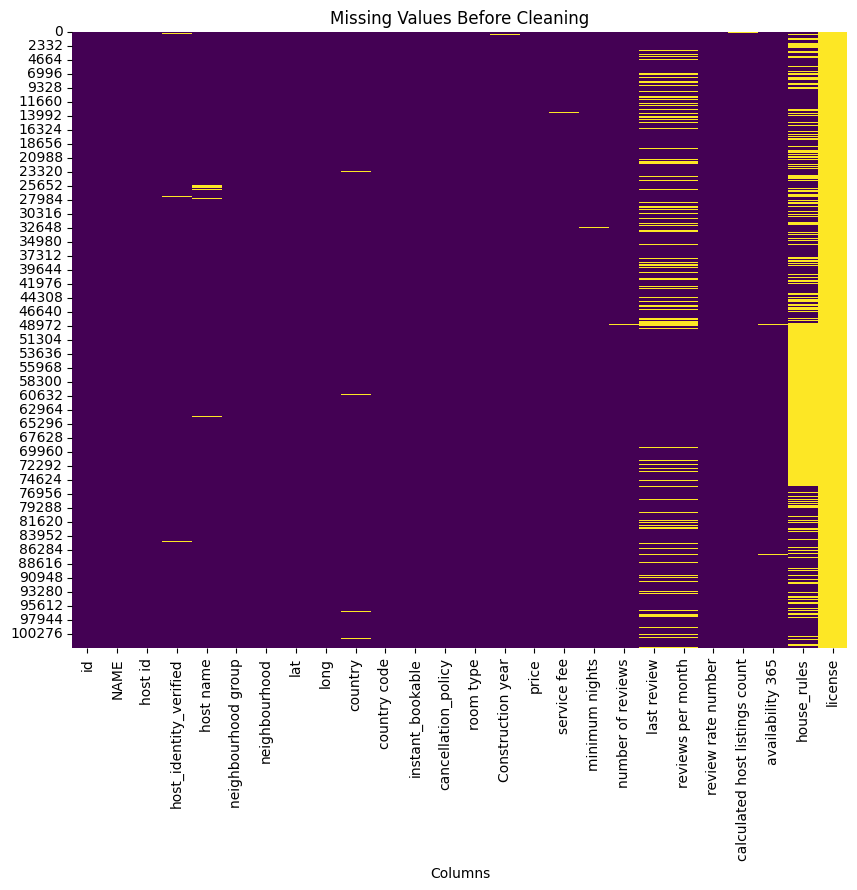

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Before Cleaning')
plt.xlabel('Columns')
plt.show()

## `Handle Missing Values`

#### Drop Columns With Alot Number Of Missing Values
- Licence ---> More Than 99% Values are Missing
- House_rules ----> More than 50% Values are Missing

In [7]:
df.drop(columns=['license','house_rules'], axis=1, inplace=True)

#### Drop Columns Which Don't Provide Any Valuable Information For Analysis
- id
- NAME
- host_id
- host name
- **These Columns are not valuable For Our Analysis**

In [8]:
df.drop(columns=['id', 'NAME', 'host id', 'host name'], axis=1, inplace=True)

#### Varify Again Totat Number Of Missing Values

In [9]:
df.isna().sum().sum()

35385

#### Visculize Again Total Number Of Missing Values

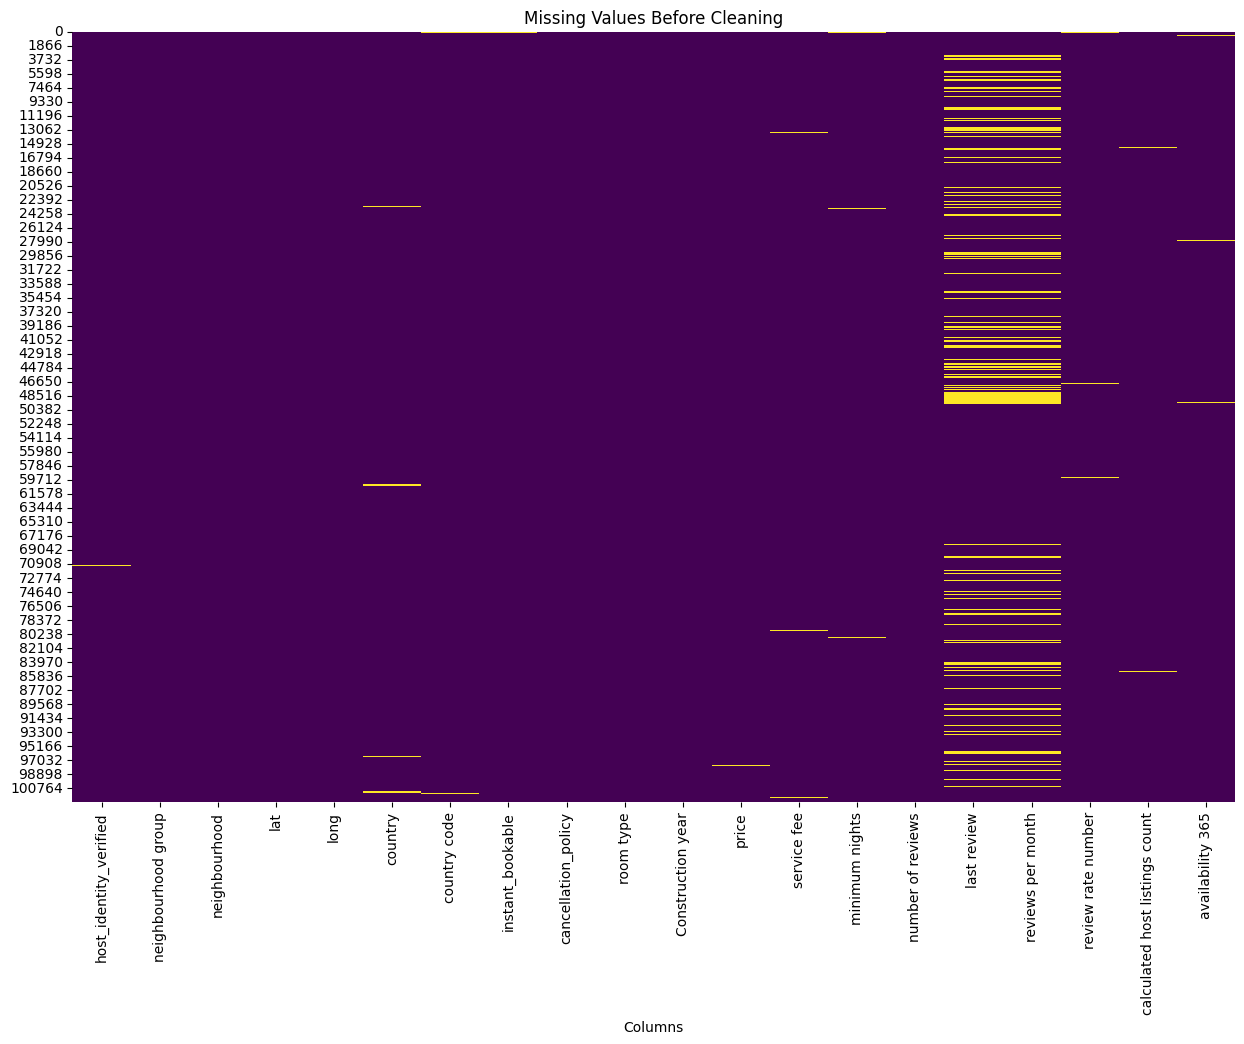

In [10]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Before Cleaning')
plt.xlabel('Columns')
plt.show()

#### For Handling With Other Columns, Check Their Data Type

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          102310 non-null  object 
 1   neighbourhood group             102570 non-null  object 
 2   neighbourhood                   102583 non-null  object 
 3   lat                             102591 non-null  float64
 4   long                            102591 non-null  float64
 5   country                         102067 non-null  object 
 6   country code                    102468 non-null  object 
 7   instant_bookable                102494 non-null  object 
 8   cancellation_policy             102523 non-null  object 
 9   room type                       102599 non-null  object 
 10  Construction year               102385 non-null  float64
 11  price                           102352 non-null  object 
 12  service fee     

#### Last Review Is Object, And It have More Than 15000+ Missing Values
- Check It's Rows

In [12]:
df['last review']

0         10/19/2021
1          5/21/2022
2                NaN
3           7/5/2019
4         11/19/2018
             ...    
102594           NaN
102595      7/6/2015
102596           NaN
102597    10/11/2015
102598           NaN
Name: last review, Length: 102599, dtype: object

#### As It is a Date Columns, So we cannot fill these values on The Base Of Prediction
- Remove These Values

In [13]:
df.dropna(subset=['last review'], inplace=True)

#### Verify Total Number Of Missing Values Again

In [14]:
df.isna().sum().sum()

2860

#### Check Missing Columns Again

In [15]:
df.isna().sum()

host_identity_verified            247
neighbourhood group                25
neighbourhood                      16
lat                                 7
long                                7
country                           489
country code                      116
instant_bookable                   93
cancellation_policy                67
room type                           0
Construction year                 185
price                             221
service fee                       241
minimum nights                    345
number of reviews                  59
last review                         0
reviews per month                  13
review rate number                288
calculated host listings count    261
availability 365                  180
dtype: int64

#### Check Unique Values Of Country

In [16]:
df.country.unique()

array(['United States', nan], dtype=object)

#### Check Unique Values Of Country Code

In [17]:
df['country code'].unique()

array(['US', nan], dtype=object)

#### Both Country and Country Code Provide Same Information So Drop One Column

In [18]:
df.drop(columns=['country'], axis=1, inplace=True)

#### Fill country code missing values with `US`

In [19]:
df['country code'] = df['country code'].fillna(value='US')

#### Drop Missing Values of Minimum Nights Column and Correct Then

In [20]:
df.dropna(subset=['minimum nights'], inplace=True)
df['minimum nights'] = df['minimum nights'].astype(int)

In [21]:
df['minimum nights'].unique()

array([  10,   30,    3,   45,    2,    1,    5,    4,   90,   14,    7,
        180,    9,   31,    6,   15,   29,    8,   47,   81,  144,  371,
        149,  273,  131,  275,  323,   59,   99,  268,  -10,  189,  340,
        128,  350,  166,  110,   57,  142,  366,   28,  200,   50,  399,
         17,   11,  452,   25,   13,   -5,   21,   27,   18,  365,   -1,
         20,  -12,   40,   44,  398,   -2,   65,   -3,   55,   60,  120,
        122,   19,  240,   88,  115,  150,  370,   16,   80,  181,   26,
        265,  300,  360,   12,   70,   39,   24,   32,  270,   22,   75,
        250,   23, 1250,  364,   74,  198,  100,  500,   35,   91,   53,
        160,  999,  186,   68,   93,   87,  183,  175,  133,   42,   33,
         37,  105,  222,   58,  210,  954, 5645, 2645, -365, -200,   85,
         48,  155,  307,  129,  145,   64,  182,  333,  119, -125,  125,
        458,  825])

In [22]:
df['minimum nights'] = abs(df['minimum nights'])

In [23]:
df['minimum nights'].unique()

array([  10,   30,    3,   45,    2,    1,    5,    4,   90,   14,    7,
        180,    9,   31,    6,   15,   29,    8,   47,   81,  144,  371,
        149,  273,  131,  275,  323,   59,   99,  268,  189,  340,  128,
        350,  166,  110,   57,  142,  366,   28,  200,   50,  399,   17,
         11,  452,   25,   13,   21,   27,   18,  365,   20,   12,   40,
         44,  398,   65,   55,   60,  120,  122,   19,  240,   88,  115,
        150,  370,   16,   80,  181,   26,  265,  300,  360,   70,   39,
         24,   32,  270,   22,   75,  250,   23, 1250,  364,   74,  198,
        100,  500,   35,   91,   53,  160,  999,  186,   68,   93,   87,
        183,  175,  133,   42,   33,   37,  105,  222,   58,  210,  954,
       5645, 2645,   85,   48,  155,  307,  129,  145,   64,  182,  333,
        119,  125,  458,  825])

#### Analyze Neighborhood and neighborhood group column

In [24]:
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Harlem', 'Greenpoint', 'Bushwick', 'Lower East Side', 'SoHo',
       'Upper East Side', 'Prospect Heights', 'Washington Heights',
       'Flatbush', 'Brooklyn Heights', 'Gowanus', 'Kips Bay',
       'Prospect-Lefferts Gardens', 'Flatlands', 'Sunnyside', 'DUMBO',
       'Carroll Gardens', 'St. George', 'Highbridge',
       'Financial District', 'Ridgewood', 'Morningside Heights',
       'Jamaica', 'Middle Village', 'NoHo', 'Flatiron District',
       'Roosevelt Island', 'Greenwich Village', 'Little Italy',
       'East Flatbush', 'Tompkinsville', 'Astoria', 'Eastchester',
       'Kingsbridge', 'Boerum Hill', 'Two Bridges', 'Queens Village',
       'Rockaway 

In [25]:
df['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', nan, 'Queens',
       'Staten Island', 'Bronx'], dtype=object)

#### Some Columns are Repeated In neighbourhood group Column, drop them

In [26]:
df = df[(df['neighbourhood group'] != 'brookln') & (df['neighbourhood group'] != 'manhatan')]

##### Explanation
- In Pandas For Filtring we use & instead of and
- We Need To Wrap Each Condition In Paranthesis

#### Drop Neighbourhood Column

In [27]:
df.drop(columns=['neighbourhood'], axis=1, inplace=True)

#### Looks For Total Missing Values and Shape Of Data Again

In [28]:
df.isna().sum().sum()

1822

In [29]:
df.isna().sum()

host_identity_verified            237
neighbourhood group                24
lat                                 7
long                                7
country code                        0
instant_bookable                   85
cancellation_policy                67
room type                           0
Construction year                 175
price                             221
service fee                       240
minimum nights                      0
number of reviews                  58
last review                         0
reviews per month                  11
review rate number                269
calculated host listings count    261
availability 365                  160
dtype: int64

In [30]:
df.shape

(86359, 18)

#### Analyze Host Identity Verified

In [31]:
df['host_identity_verified'].head()

0    unconfirmed
1       verified
3    unconfirmed
4       verified
5       verified
Name: host_identity_verified, dtype: object

In [32]:
df['host_identity_verified'].value_counts()

host_identity_verified
unconfirmed    43097
verified       43025
Name: count, dtype: int64

#### Values are Too Close To Each Other So We Cannot Fill On The Base Of Mode
- Drop Missing Values

In [33]:
df.dropna(subset=['host_identity_verified'], inplace=True)

#### Analyze Number Of Reviews

In [34]:
df['number of reviews'].head()

0      9.0
1     45.0
3    270.0
4      9.0
5     74.0
Name: number of reviews, dtype: float64

In [35]:
max(df['number of reviews'].head())

270.0

In [36]:
min(df['number of reviews'].head())

9.0

In [37]:
df.dropna(subset=['number of reviews'], inplace=True)

In [38]:
df['number of reviews'] = df['number of reviews'].astype(int)

#### Analyze Construction Year Columns

In [39]:
df['Construction year'].head()

0    2020.0
1    2007.0
3    2005.0
4    2009.0
5    2013.0
Name: Construction year, dtype: float64

In [40]:
df['Construction year'].value_counts()

Construction year
2006.0    4423
2008.0    4413
2014.0    4394
2019.0    4381
2015.0    4318
2018.0    4301
2010.0    4300
2003.0    4294
2009.0    4291
2005.0    4290
2017.0    4285
2011.0    4283
2012.0    4283
2020.0    4274
2007.0    4268
2022.0    4251
2016.0    4249
2021.0    4245
2004.0    4229
2013.0    4127
Name: count, dtype: int64

#### We have Two Options
- As 175 values are missing and our all years have values greater than 4200, except 2013, we can fill missing with 2013
- Drop Missing Values

In [41]:
df['Construction year'] = df['Construction year'].fillna(value='2013', axis=0)

In [42]:
df['Construction year'] = df['Construction year'].astype(int)

#### Analyze Availability 365 Column

In [43]:
df['availability 365'].head()

0    286.0
1    228.0
3    322.0
4    289.0
5    374.0
Name: availability 365, dtype: float64

#### Check Shape of Dataset and Total Number Of Missing Values

In [44]:
df.shape

(86064, 18)

In [45]:
df.isna().sum().sum()

1306

#### Drop All Missing Values b/c They Don't affect our Dataset Now

In [46]:
df.dropna(inplace=True)

#### Visculize Total Number Of Missing Values

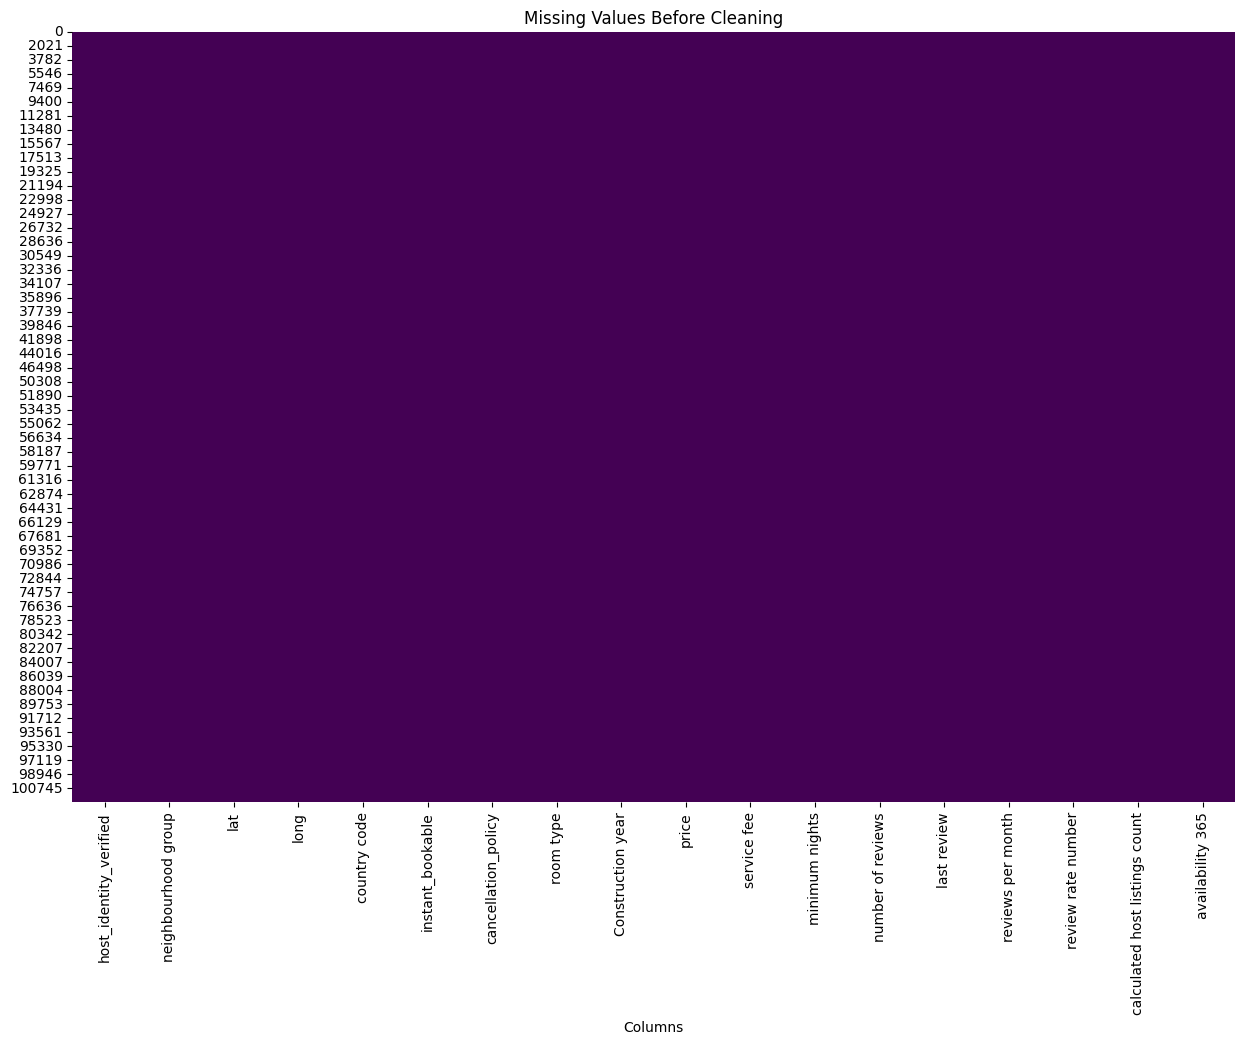

In [47]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Before Cleaning')
plt.xlabel('Columns')
plt.show()

## `Correct Remaining Data Types`

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84945 entries, 0 to 102597
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_identity_verified          84945 non-null  object 
 1   neighbourhood group             84945 non-null  object 
 2   lat                             84945 non-null  float64
 3   long                            84945 non-null  float64
 4   country code                    84945 non-null  object 
 5   instant_bookable                84945 non-null  object 
 6   cancellation_policy             84945 non-null  object 
 7   room type                       84945 non-null  object 
 8   Construction year               84945 non-null  int32  
 9   price                           84945 non-null  object 
 10  service fee                     84945 non-null  object 
 11  minimum nights                  84945 non-null  int32  
 12  number of reviews               8494

In [49]:
df.head(3)

,host_identity_verified,neighbourhood group,lat,long,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,unconfirmed,Brooklyn,40.64749,-73.97237,US,False,strict,Private room,2020,$966,$193,10,9,10/19/2021,0.21,4.0,6.0,286.0
1,verified,Manhattan,40.75362,-73.98377,US,False,moderate,Entire home/apt,2007,$142,$28,30,45,5/21/2022,0.38,4.0,2.0,228.0
3,unconfirmed,Brooklyn,40.68514,-73.95976,US,True,moderate,Entire home/apt,2005,$368,$74,30,270,7/5/2019,4.64,4.0,1.0,322.0


#### Convert Calculated Host Listing Count into int

In [50]:
df['calculated host listings count'] = df['calculated host listings count'].astype(int)

#### Rename Column

In [51]:
df.rename(columns={'calculated host listings count': 'host_listings_count'}, inplace=True)

#### Convert availability 365 to int

In [52]:
df['availability 365'] = df['availability 365'].astype(int)

#### Rename Column

In [53]:
df.rename(columns={'availabilty 365': 'avail_365'}, inplace=True)

#### Convert Review Rate Number To int

In [54]:
df['review rate number'] = df['review rate number'].astype(int)

#### Rename Column

In [55]:
df.rename(columns={'review rate number':'review'}, inplace=True)

#### Correct Price Column
- Price Column Start with `$` sign
- Remove `$` sign and convert in int

In [56]:
# df['price'] = df['price'].str.replace('$', '', regex=False).astype(int)

print('''
When we run above commands we get following error

ValueError: invalid literal for int() with base 10: '1,060 '

So, I Try another way
''')


When we run above commands we get following error

ValueError: invalid literal for int() with base 10: '1,060 '

So, I Try another way



In [57]:
# Remove dollar sign and commas, and trim any whitespace
df['price'] = df['price'].str.replace(r'[\$,]', '', regex=True).str.strip()

In [58]:
df['price'] = df['price'].astype(int)

#### Correct Service Fee Columns

In [59]:
df['service fee'] = df['service fee'].str.replace('$', '', regex=False).astype(int)

#### Visculize Again

In [60]:
df.head()

,host_identity_verified,neighbourhood group,lat,long,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review,host_listings_count,availability 365
0,unconfirmed,Brooklyn,40.64749,-73.97237,US,False,strict,Private room,2020,966,193,10,9,10/19/2021,0.21,4,6,286
1,verified,Manhattan,40.75362,-73.98377,US,False,moderate,Entire home/apt,2007,142,28,30,45,5/21/2022,0.38,4,2,228
3,unconfirmed,Brooklyn,40.68514,-73.95976,US,True,moderate,Entire home/apt,2005,368,74,30,270,7/5/2019,4.64,4,1,322
4,verified,Manhattan,40.79851,-73.94399,US,False,moderate,Entire home/apt,2009,204,41,10,9,11/19/2018,0.10,3,1,289
5,verified,Manhattan,40.74767,-73.97500,US,True,flexible,Entire home/apt,2013,577,115,3,74,6/22/2019,0.59,3,1,374


#### Rename Columns

In [61]:
df.rename(columns={
    'host_identity_verified':'host_verified',
    'neighbourhood group':'neghbour_group',
    'country code':'country',
    'room type':'room_type',
    'Construction year':'construction_year',
    'service fee':'service_fee',
    'minimum nights':'minimum_nights',
    'number of reviews':'no_of_reviews',
    'last review':'last_review',
    'reviews per month':'per_month_review',
    'host listing count':'host_lisitng_count',
    'availability 365':'availability_365'
}, inplace=True)

#### Check Columns Name

In [62]:
df.columns

Index(['host_verified', 'neghbour_group', 'lat', 'long', 'country',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'no_of_reviews', 'last_review', 'per_month_review', 'review',
       'host_listings_count', 'availability_365'],
      dtype='object')

# `Data Visulization`

In [63]:
# Define color palettes for different numbers of bars
palettes = {
    "two_bar": sns.color_palette(["#4CAF50", "#FF5722"]),  # 2 colors
    "three_bar": sns.color_palette(["#4CAF50", "#FF5722", "#FFC107"]),  # 3 colors
    "four_bar": sns.color_palette(["#4CAF50", "#FF5722", "#FFC107", "#03A9F4"]),  # 4 colors
    "five_bar": sns.color_palette(["#4CAF50", "#FF5722", "#FFC107", "#03A9F4", "#9C27B0"]),  # 5 colors
    "six_bar": sns.color_palette(["#4CAF50", "#FF5722", "#FFC107", "#03A9F4", "#9C27B0", "#795548"])  # 6 colors
}

### `1. Univariate Analysis`
- #### Categorical Variables

#### 1. Host Verified:
- Show the count or proportion of verified vs. non-verified hosts.

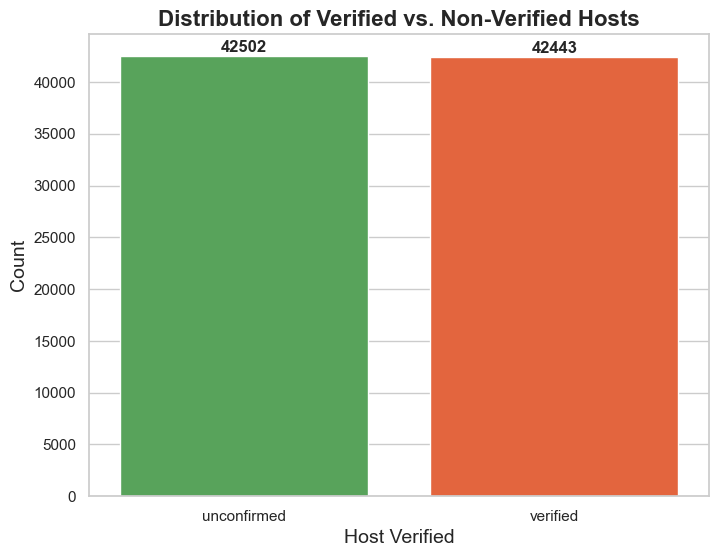

In [64]:
# Set a more advanced style
sns.set(style="whitegrid")

# Plot the countplot with the custom colors
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='host_verified', data=df, palette=palettes['two_bar'], hue='host_verified')

# Adding a title and labels
plt.title('Distribution of Verified vs. Non-Verified Hosts', fontsize=16, fontweight='bold')
plt.xlabel('Host Verified', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adding the count labels on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 6), 
                textcoords='offset points',
                fontsize=12, fontweight='bold')

# Display the plot
plt.show()


### 2. Neighbour Group:
- Display the distribution of listings across different neighborhood groups.

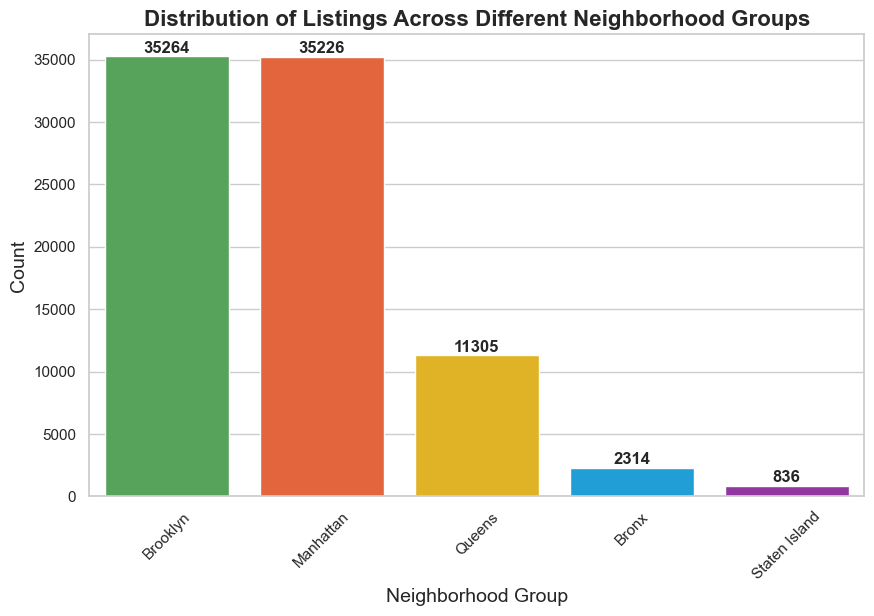

In [65]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the countplot with hue properly set
ax = sns.countplot(x='neghbour_group', data=df, palette=palettes['five_bar'], hue='neghbour_group')

# Add titles and labels
plt.title('Distribution of Listings Across Different Neighborhood Groups', fontsize=16, fontweight='bold')
plt.xlabel('Neighborhood Group', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Add the count labels on the bars
for p in ax.patches:
    count = int(p.get_height())
    if count > 0:  # Only add labels to bars with a positive count
        ax.annotate(f'{count}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 6), 
                    textcoords='offset points',
                    fontsize=12, fontweight='bold')

# Display the plot
plt.show()

#### 3. Instant Bookable:
- Compare instant bookable vs. non-instant bookable listings.

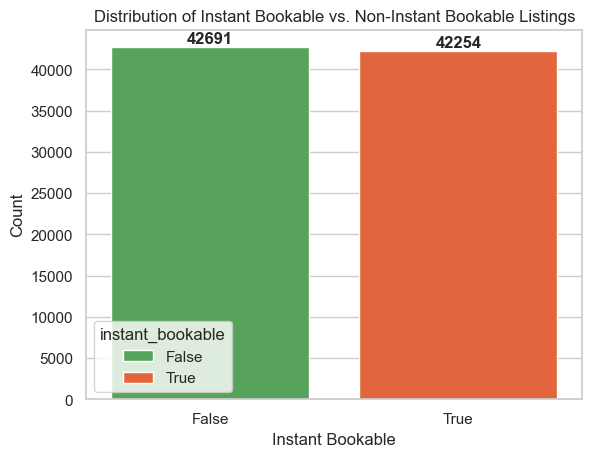

In [66]:
# Instant Bookable
ax = sns.countplot(x=df['instant_bookable'], palette=palettes['two_bar'], hue=df['instant_bookable'])
plt.title('Distribution of Instant Bookable vs. Non-Instant Bookable Listings')
plt.xlabel('Instant Bookable')
plt.ylabel('Count')
# Adding the count labels on the bars
for p in ax.patches:
    count = int(p.get_height())
    if count > 0:  # Only add labels to bars with a positive count
        ax.annotate(f'{count}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 6), 
                    textcoords='offset points',
                    fontsize=12, fontweight='bold')
plt.show()

#### 4. Cancellation Policy:
- Illustrate the various cancellation policies and their frequencies.

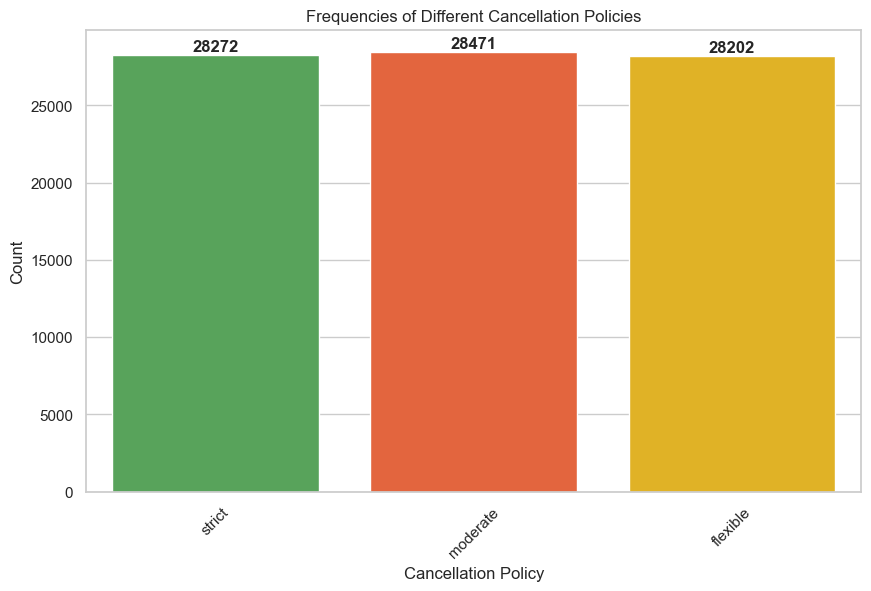

In [67]:
# Cancellation Policy
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='cancellation_policy', data=df, hue='cancellation_policy',palette=palettes['three_bar'])
plt.title('Frequencies of Different Cancellation Policies')
plt.xlabel('Cancellation Policy')
plt.ylabel('Count')
plt.xticks(rotation=45)
# Adding the count labels on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 6), 
                textcoords='offset points',
                fontsize=12, fontweight='bold')
plt.show()

### 5. Room Type:
- Show the distribution of different room types (e.g., entire home, private room).

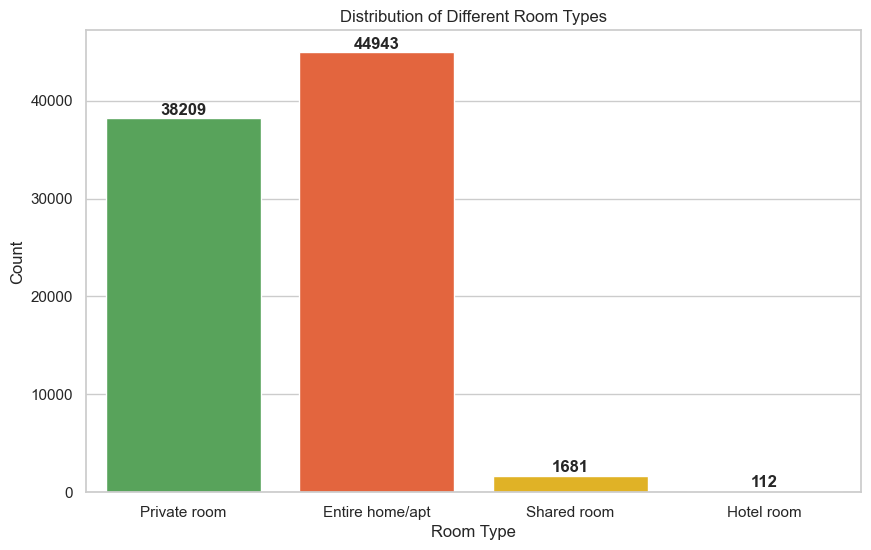

In [68]:
# Room Type
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='room_type', data=df, hue='room_type', palette=palettes['four_bar'])
plt.title('Distribution of Different Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
# Adding the count labels on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 6), 
                textcoords='offset points',
                fontsize=12, fontweight='bold')
plt.show()

### 6. Review
- Distribution of reviews

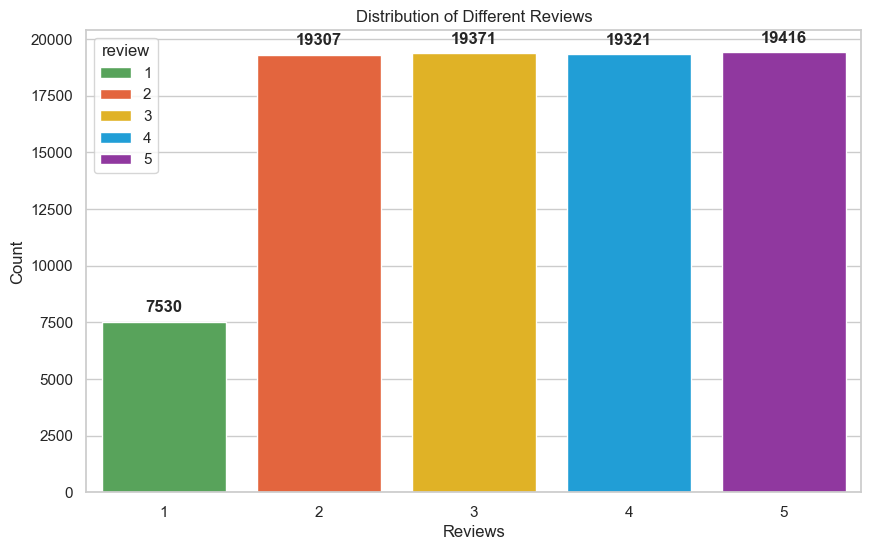

In [69]:
# Room Type
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='review', data=df, hue='review', palette=palettes['five_bar'])
plt.title('Distribution of Different Reviews')
plt.xlabel('Reviews')
plt.ylabel('Count')
# Adding the count labels on the bars
for p in ax.patches:
    count = int(p.get_height())
    if count > 0:  # Only add labels to bars with a positive count
        ax.annotate(f'{count}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points',
                    fontsize=12, fontweight='bold')
plt.show()

- **Neumerical Categories**

#### 1. Histogram of Latitude

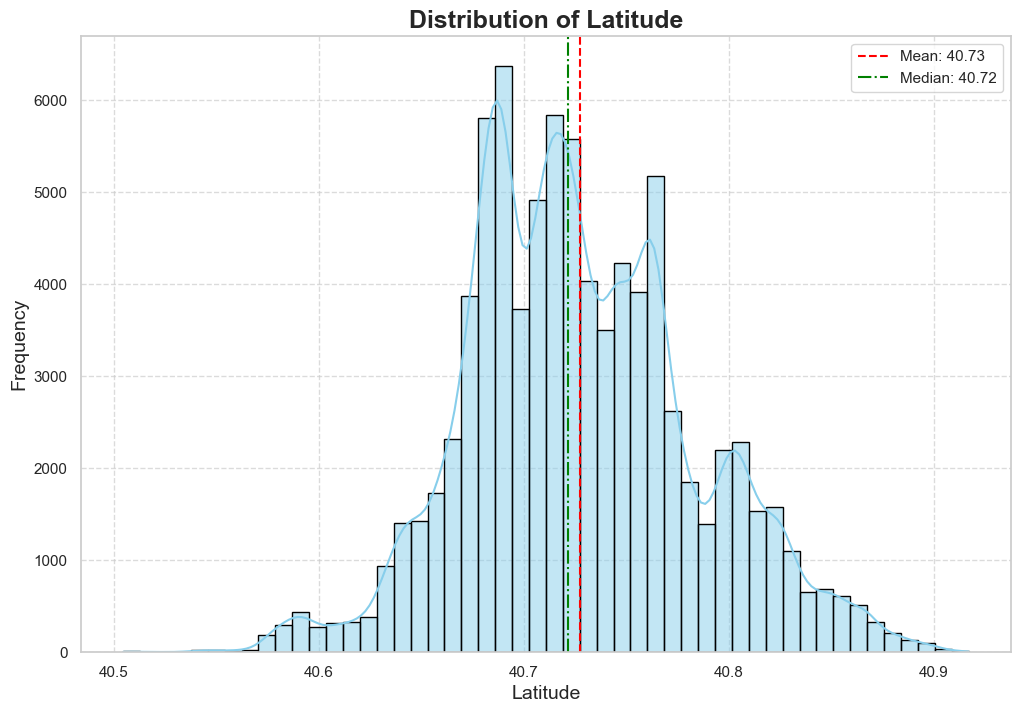

In [89]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(df['lat'], bins=50, kde=True, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Latitude', fontsize=18, fontweight='bold')
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add mean and median lines
mean_lat = df['lat'].mean()
median_lat = df['lat'].median()
ax.axvline(mean_lat, color='red', linestyle='--', label=f'Mean: {mean_lat:.2f}')
ax.axvline(median_lat, color='green', linestyle='-.', label=f'Median: {median_lat:.2f}')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Show the plot
plt.show()

#### Histogram For Longitude

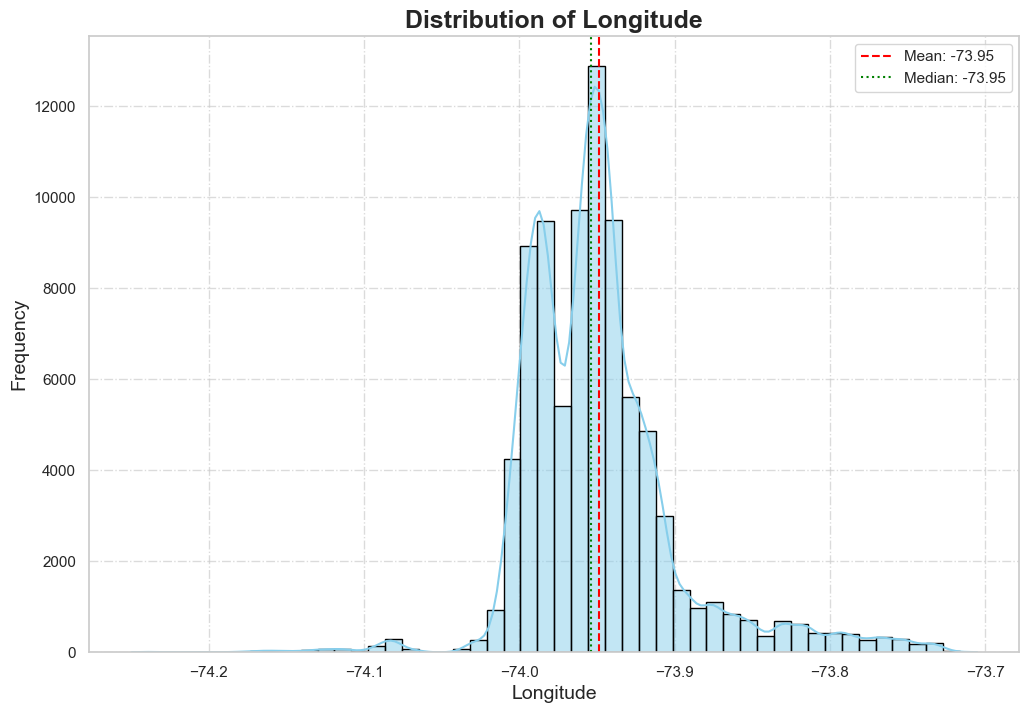

In [90]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(df['long'], bins=50, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Longitude', fontsize=18, fontweight='bold')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

mean_long = df['long'].mean()
median_long = df['long'].median()
ax.axvline(mean_long, color='red', linestyle='--', label=f'Mean: {mean_long:.2f}')
ax.axvline(median_long, color='green', linestyle=':', label=f'Median: {median_long:.2f}')

ax.grid(True, linestyle='-.', alpha=0.7)
plt.legend()
plt.show()

#### 3. Histogram OF Price

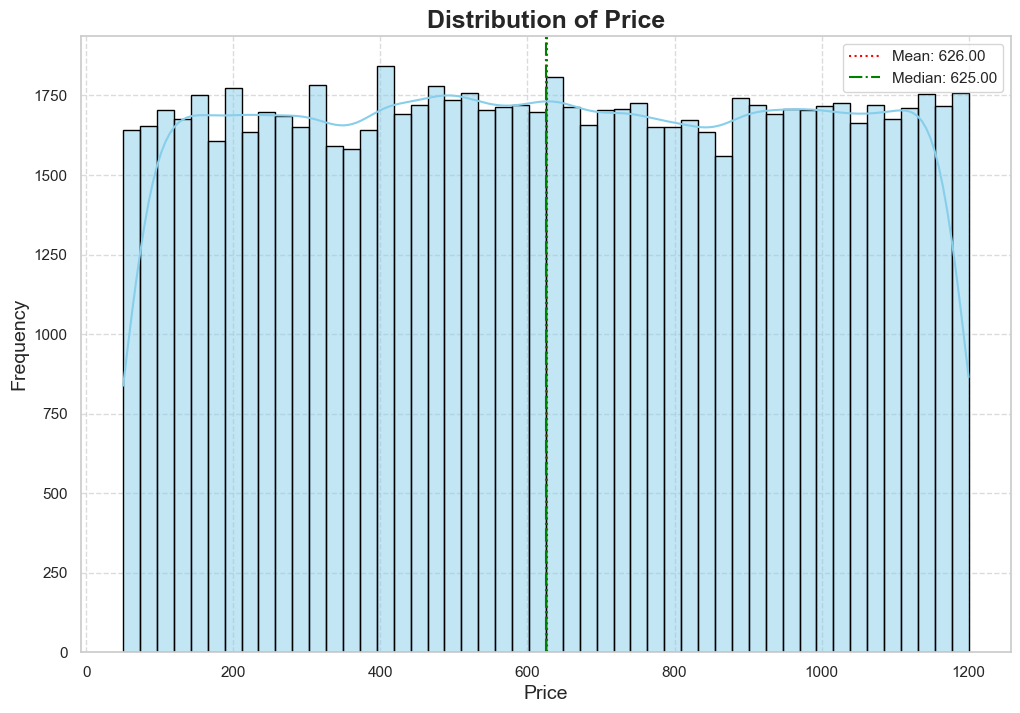

In [93]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(df['price'], bins=50, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Price', fontsize=18, fontweight='bold')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

mean_price = df['price'].mean()
median_price = df['price'].median()
ax.axvline(mean_price, color='red', linestyle=':', label=f'Mean: {mean_price:.2f}')
ax.axvline(median_price, color='green', linestyle='-.', label=f'Median: {median_price:.2f}')

ax.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

#### 4. Histogram Of Service Fee

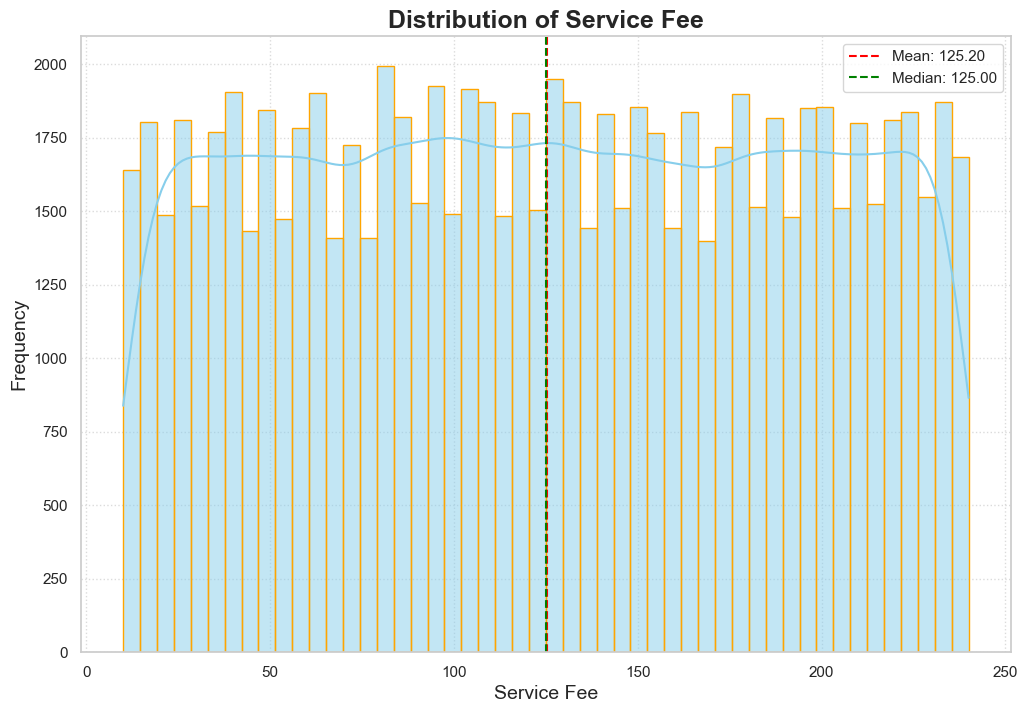

In [96]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(df['service_fee'], bins=50, kde=True, color='skyblue', edgecolor='orange')

plt.title('Distribution of Service Fee', fontsize=18, fontweight='bold')
plt.xlabel('Service Fee', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

mean_fee = df['service_fee'].mean()
median_fee = df['service_fee'].median()
ax.axvline(mean_fee, color='red', linestyle='--', label=f'Mean: {mean_fee:.2f}')
ax.axvline(median_fee, color='green', linestyle='--', label=f'Median: {median_fee:.2f}')

ax.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.show()

#### 5. Histogram Of Minimum Nights

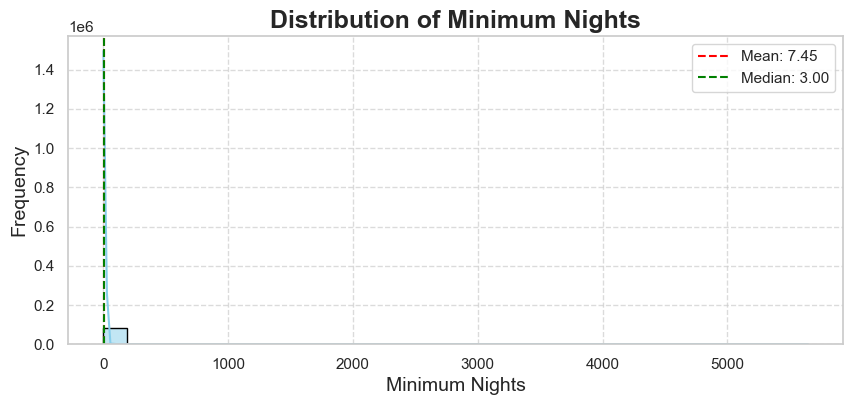

In [99]:
plt.figure(figsize=(10,4))
ax = sns.histplot(df['minimum_nights'], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Minimum Nights', fontsize=18, fontweight='bold')
plt.xlabel('Minimum Nights', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

mean_nights = df['minimum_nights'].mean()
median_nights = df['minimum_nights'].median()
ax.axvline(mean_nights, color='red', linestyle='--', label=f'Mean: {mean_nights:.2f}')
ax.axvline(median_nights, color='green', linestyle='--', label=f'Median: {median_nights:.2f}')

ax.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

#### 6. Histogram Of Number Of Reviews

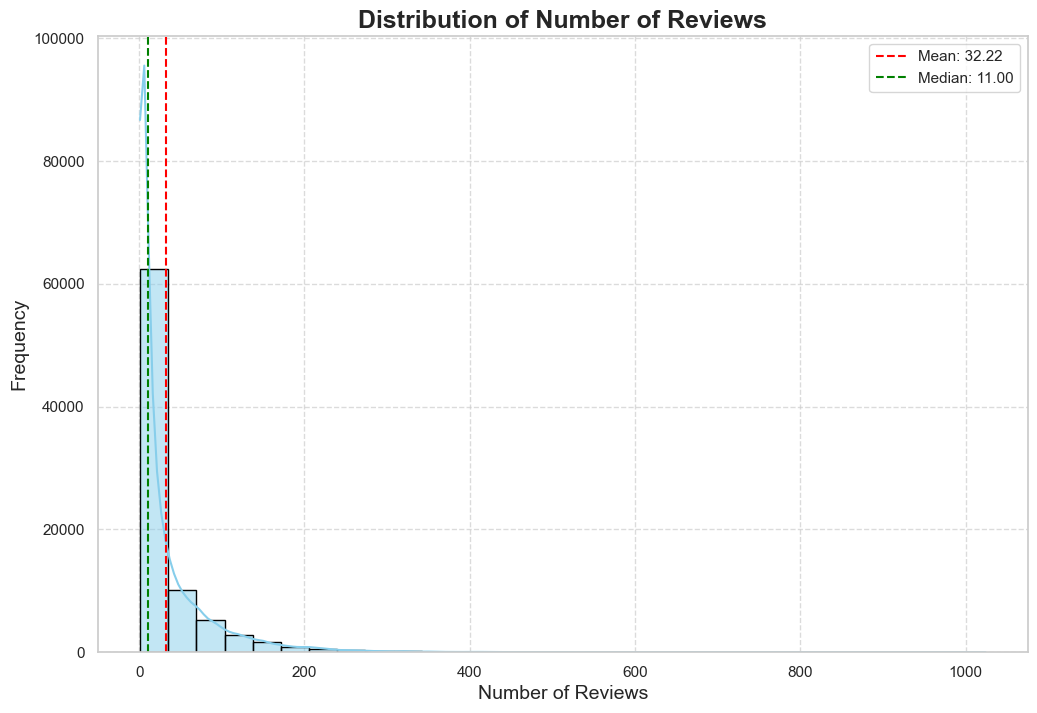

In [100]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(df['no_of_reviews'], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Number of Reviews', fontsize=18, fontweight='bold')
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

mean_reviews = df['no_of_reviews'].mean()
median_reviews = df['no_of_reviews'].median()
ax.axvline(mean_reviews, color='red', linestyle='--', label=f'Mean: {mean_reviews:.2f}')
ax.axvline(median_reviews, color='green', linestyle='--', label=f'Median: {median_reviews:.2f}')

ax.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

#### 7. Histogram Of Availability 365

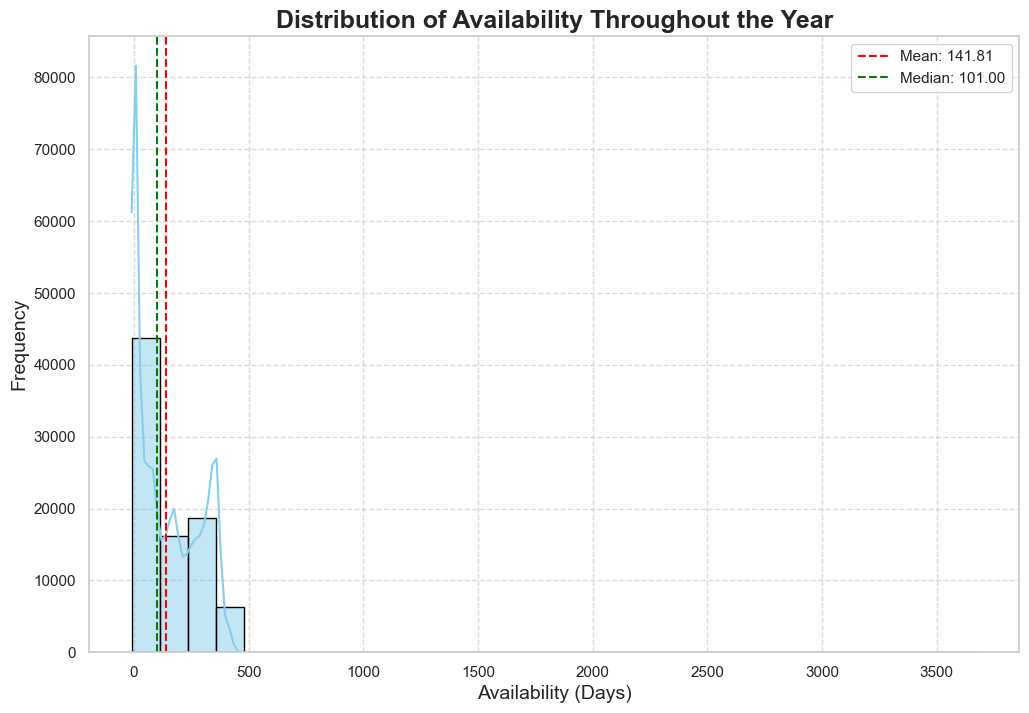

In [101]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(df['availability_365'], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Availability Throughout the Year', fontsize=18, fontweight='bold')
plt.xlabel('Availability (Days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

mean_availability = df['availability_365'].mean()
median_availability = df['availability_365'].median()
ax.axvline(mean_availability, color='red', linestyle='--', label=f'Mean: {mean_availability:.2f}')
ax.axvline(median_availability, color='green', linestyle='--', label=f'Median: {median_availability:.2f}')

ax.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()